# Question 1: Not Quite Plug and Chug

In [31]:
import numpy as np 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

training = np.loadtxt('training.csv', delimiter=',')
test = np.loadtxt('test.csv', delimiter=',')

training_data = training[:, :3]
training_labels = training[:, 3]

test_data = test[:, :3]
test_labels = test[:, 3]

In [7]:
degrees = [1, 2, 3, 5]
Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1]

train_results = np.zeros((4, 5))
test_results = np.zeros((4, 5))

for i, d in enumerate(degrees):
    for j, c in enumerate(Cs):
        model = SVC(C=c, kernel='poly', degree=d)
        model.fit(training_data, training_labels)
        training_error = 1 - model.score(training_data, training_labels)
        test_error = 1 - model.score(test_data, test_labels)
        
        train_results[i, j] = training_error
        test_results[i, j] = test_error

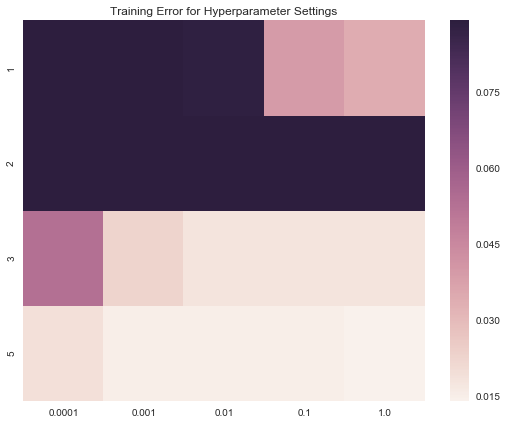

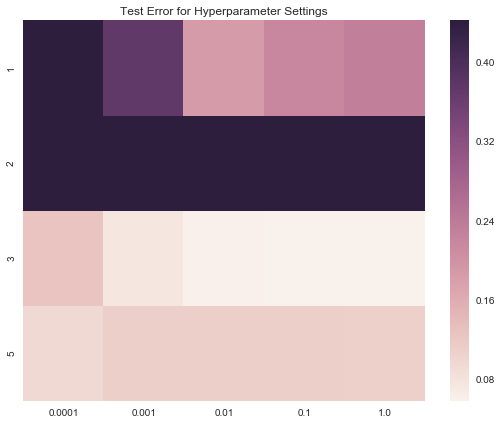

In [38]:
train_results_df = pd.DataFrame(train_results, index=degrees, columns=Cs)
test_results_df = pd.DataFrame(test_results, index=degrees, columns=Cs)

fig, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(train_results_df)
plt.title("Training Error for Hyperparameter Settings")
plt.show()

fig, ax = plt.subplots(figsize=(9, 7))
plt.title("Test Error for Hyperparameter Settings")
ax = sns.heatmap(test_results_df)
plt.show()

## Analysis
#### On what basis would you decide that a hyperparameter setting is optimal? Which setting of (C, d) gave the optimal results?
The ultimate point of the algorithm is to generalize to a set of data that it was not trained on. Hence, the optimal hyperparameter setting is that which gives the lowest generalization error, i.e. test error. We see that the setting  ```(C=1, d=3)``` gives us the lowest test error. Note that this is different from the best training error which is achieved with ```(C=1, d=5)```!

#### You’ll notice that between C and d, one factor mattered far more than the other. What can you conclude about the structure of the datasets and how they were generated?
```d``` mattered more than ```C```. In fact, the training dataset was generated by sampling from a predefined cubic function on the interval ```[-5, 5]```. The test set was then sampled from the same function but on the interval ```[-50, 50]```. Predictably, the degree of the kernel SVM makes the biggest difference on this.

#### With as much granularity as possible, which hyperparameter settings are underfitting and which are overfitting? What allows you to make this claim?
All of the models with ```d=1, 2``` were underfitting. With worse settings of ```C``` those models were underfitting even more. With ```d=5```, the models were all overfitting. You can see this because training error continued to decrease, but test error increases with better values of ```C```. Furthermore, training error is better than that of ```d=3``` but test error was worse than that of ```d=3```.


# K-Fold Cross-Validation

In [48]:
from sklearn.model_selection import KFold
gammas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
errors = []

kf = KFold(n_splits=7)
for i, (train_inds, test_inds) in enumerate(kf.split(training_data, training_labels)):
    train_data = training_data[train_inds]
    train_labels = training_labels[train_inds]
    
    test_data = training_data[test_inds]
    test_labels = training_labels[test_inds]
    
    model = SVC(kernel='rbf', gamma=gammas[i])
    model.fit(train_data, train_labels)
    error = 1 - model.score(test_data, test_labels)
    errors.append(error)

df = pd.DataFrame(np.array([gammas, errors]).T, columns=["gamma", "CV error"])
df


,gamma,CV error
0,0.001,0.062937
1,0.010,0.076923
2,0.100,0.034965
3,1.000,0.062937
4,10.000,0.097902
5,100.000,0.090909
6,1000.000,0.119718
